<a href="https://colab.research.google.com/github/bluemonkeyey/kql_query_Azure_Data_Explorer/blob/main/Copia_de_Ralgebralineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("OpenImageR")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ramify")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



 [1] "00.png" "01.png" "02.png" "03.png" "04.png" "05.png" "06.png" "07.png"
 [9] "08.png" "09.png" "10.png" "11.png" "12.png" "13.png" "14.png" "15.png"
[17] "16.png" "17.png" "18.png" "19.png" "20.png" "21.png" "22.png" "23.png"
[25] "24.png" "25.png" "26.png" "27.png" "28.png" "29.png" "30.png" "31.png"
[33] "32.png" "33.png" "34.png" "35.png" "36.png" "37.png" "38.png" "39.png"
Leyendo archivo: 00.png 
Leyendo archivo: 01.png 
Leyendo archivo: 02.png 
Leyendo archivo: 03.png 
Leyendo archivo: 04.png 
Leyendo archivo: 05.png 
Leyendo archivo: 06.png 
Leyendo archivo: 07.png 
Leyendo archivo: 08.png 
Leyendo archivo: 09.png 
Leyendo archivo: 10.png 
Leyendo archivo: 11.png 
Leyendo archivo: 12.png 
Leyendo archivo: 13.png 
Leyendo archivo: 14.png 
Leyendo archivo: 15.png 
Leyendo archivo: 16.png 
Leyendo archivo: 17.png 
Leyendo archivo: 18.png 
Leyendo archivo: 19.png 
Leyendo archivo: 20.png 
Leyendo archivo: 21.png 
Leyendo archivo: 22.png 
Leyendo archivo: 23.png 
Leyendo archivo

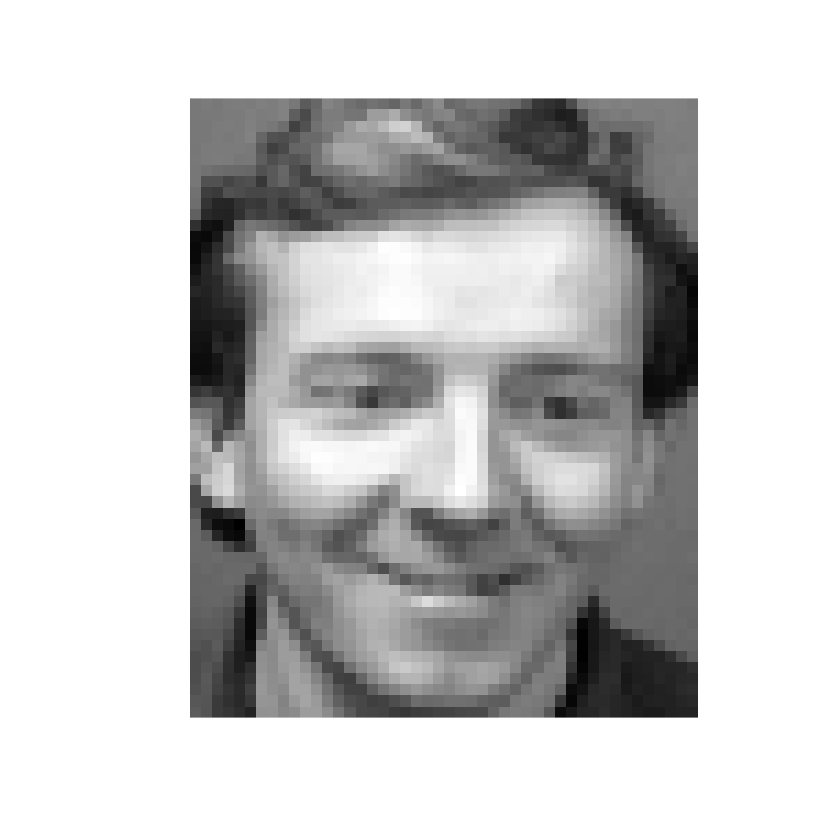

In [ ]:
# Cargar las bibliotecas necesarias
library(OpenImageR)
library(ramify)

# Obtener la lista de archivos PNG en el directorio actual
Files <- list.files(pattern = "\\.png$")

# Verificar la lista de archivos
print(Files)

# Definir las dimensiones de las imágenes
N <- length(Files)  # Número de personas (ajustado según el número de archivos disponibles)
R <- 56  # Número de filas de cada imagen
C <- 46  # Número de columnas de cada imagen

# Inicializar una lista para almacenar las imágenes leídas
Results <- list()

# Leer y almacenar imágenes en la lista
for (i in seq_along(Files)) {
  tryCatch({
    cat("Leyendo archivo:", Files[i], "\n") # Mensaje de depuración
    Image <- readImage(Files[i])
    Results[[i]] <- Image
  }, error = function(e) {
    cat("Error al leer el archivo:", Files[i], "\n")
  })
}

# Verificar si se han leído las imágenes correctamente
if (length(Results) == 0) {
  stop("No se leyeron imágenes. Verifica las extensiones de los archivos y el directorio de trabajo.")
}

# Convertir la lista de imágenes a un array 3D
X <- array(as.numeric(unlist(Results)), dim = c(N, R, C))

# Convertir las imágenes a una representación vectorial
M <- R * C
X_vector <- resize(X, nrow = N, ncol = M, byrow = TRUE)
X_matrix <- resize(X_vector, N, R, C, byrow = FALSE)

# Definir la función para mostrar imágenes
plt_img <- function(I) {
  y <- 10 * (1:nrow(I))
  x <- 10 * (1:ncol(I))
  image(x, y, t(apply(I, 2, rev)), col = grey(seq(0, 1, length = 256)), axes = FALSE, asp = 1, xlab = '', ylab = '')
}

# Mostrar la imagen I = 3
plt_img(X_matrix[3, , ])


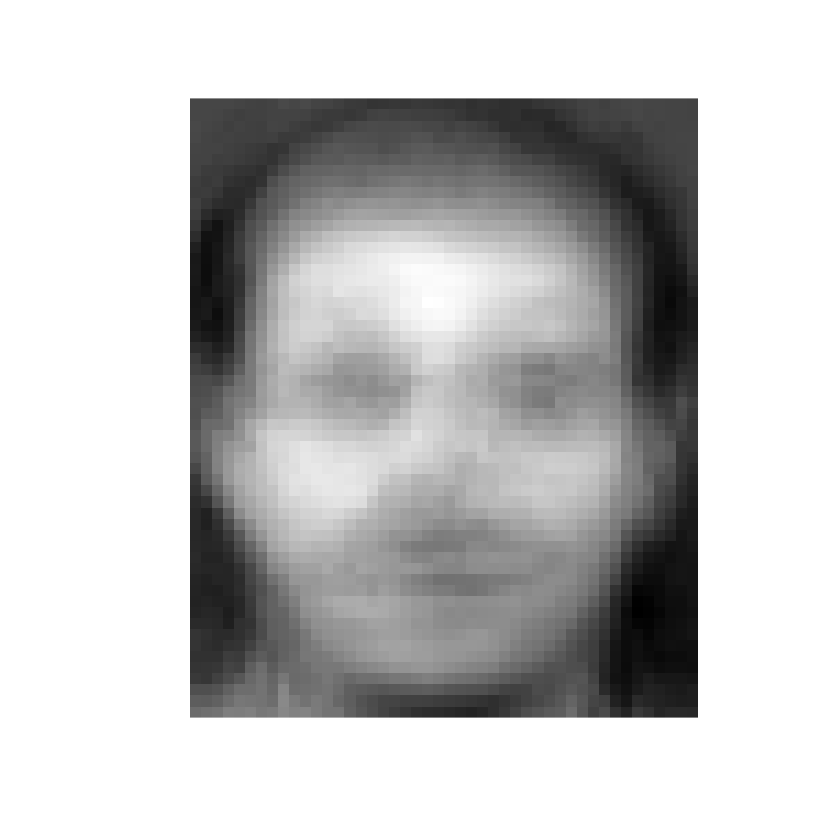

[1] 0.0155592


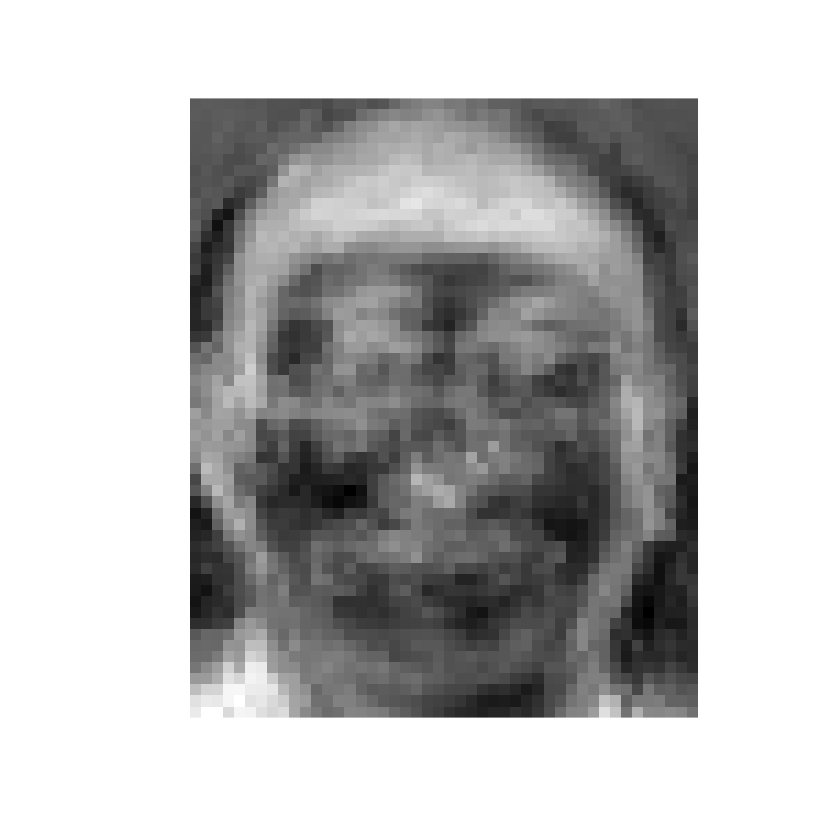

In [ ]:
X_mean <- apply(X_vector, 2, mean)
X_std <- apply(X_vector, 2, sd)

plt_img(matrix(X_mean, nrow = R, ncol = C))
plt_img(matrix(X_std, nrow = R, ncol = C))

Xs <- scale(X_vector)
mean_persona_I <- mean(Xs[3, ])
print(mean_persona_I)
CXs <- cov(Xs)



Valor propio asociado a P 286.3334 
Número de componentes principales para explicar al menos el 70% de la varianza: 7 


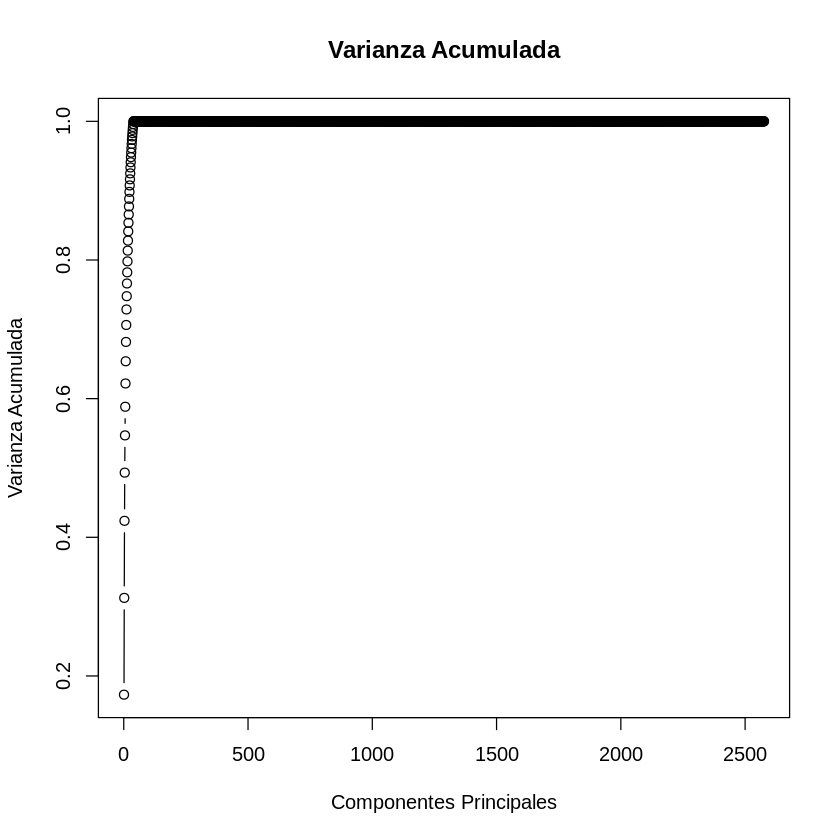

In [ ]:
eigen_CXs <- eigen(CXs)
valores_propios <- eigen_CXs$values
vectores_propios <- eigen_CXs$vectors

valor_propio_P <- valores_propios[3]

cat("Valor propio asociado a P", valor_propio_P, "\n")

plot(cumsum(valores_propios) / sum(valores_propios), type = 'b', main = 'Varianza Acumulada', xlab = 'Componentes Principales', ylab = 'Varianza Acumulada')

# Cálculo del número de componentes necesarios para explicar al menos el 50% de la varianza
varianza_acumulada <- cumsum(valores_propios) / sum(valores_propios)
L <- which(varianza_acumulada >= 0.60)[1]

# Mostrar el número de componentes seleccionados
cat("Número de componentes principales para explicar al menos el 70% de la varianza:", L, "\n")



suma cara propia P -4.971223 


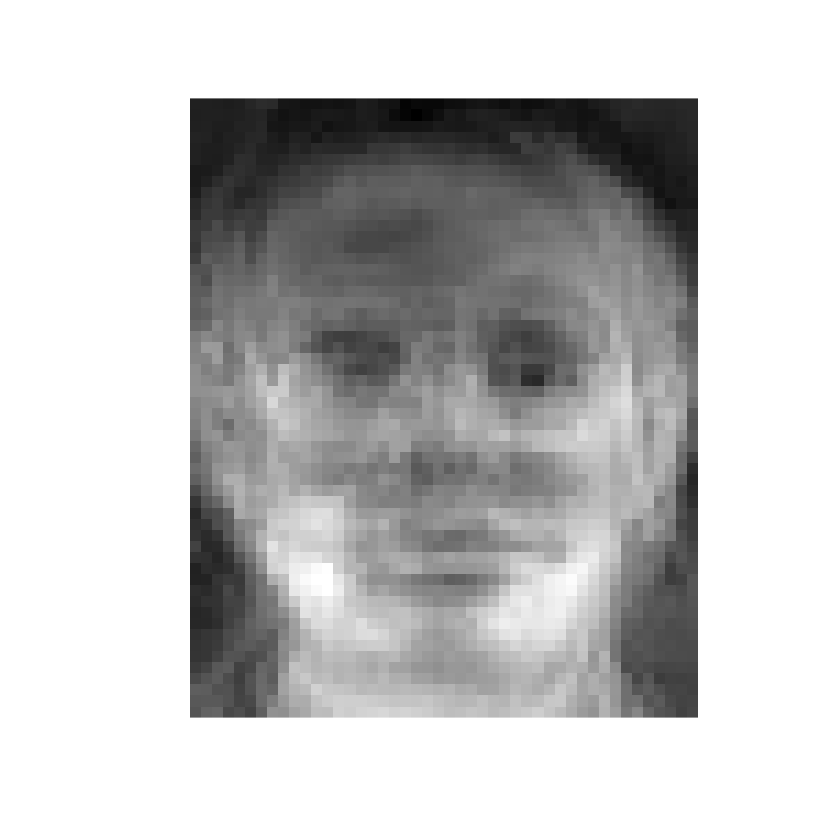

In [ ]:
plt_img(matrix(vectores_propios[, 3], nrow = R, ncol = C))

suma_coeficientes_P <- sum(vectores_propios[, 3])

# Mostrar suma coeficientes
cat("suma cara propia P", suma_coeficientes_P, "\n")


In [ ]:
varianza_acumulada <- cumsum(valores_propios) / sum(valores_propios)
L <- which(varianza_acumulada >= 0.60)[1]
print(L)

[1] 7


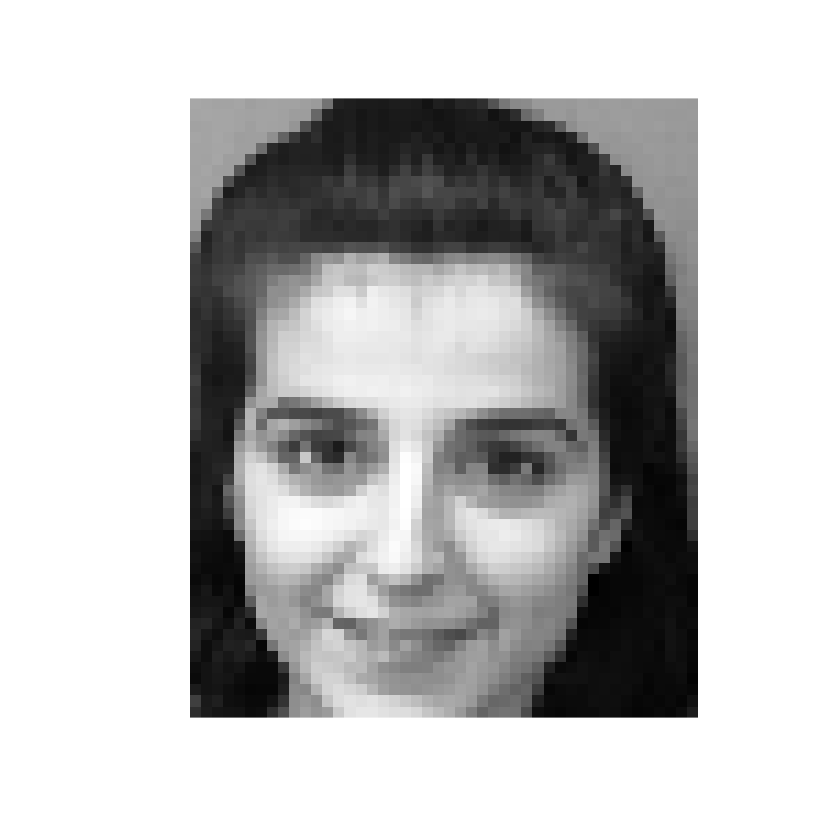

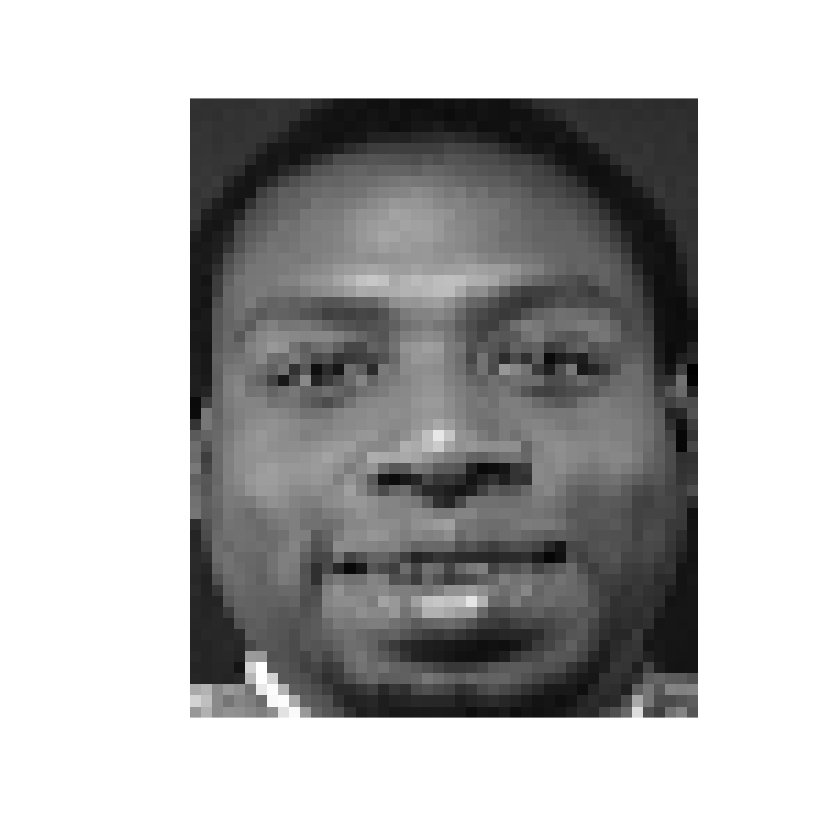

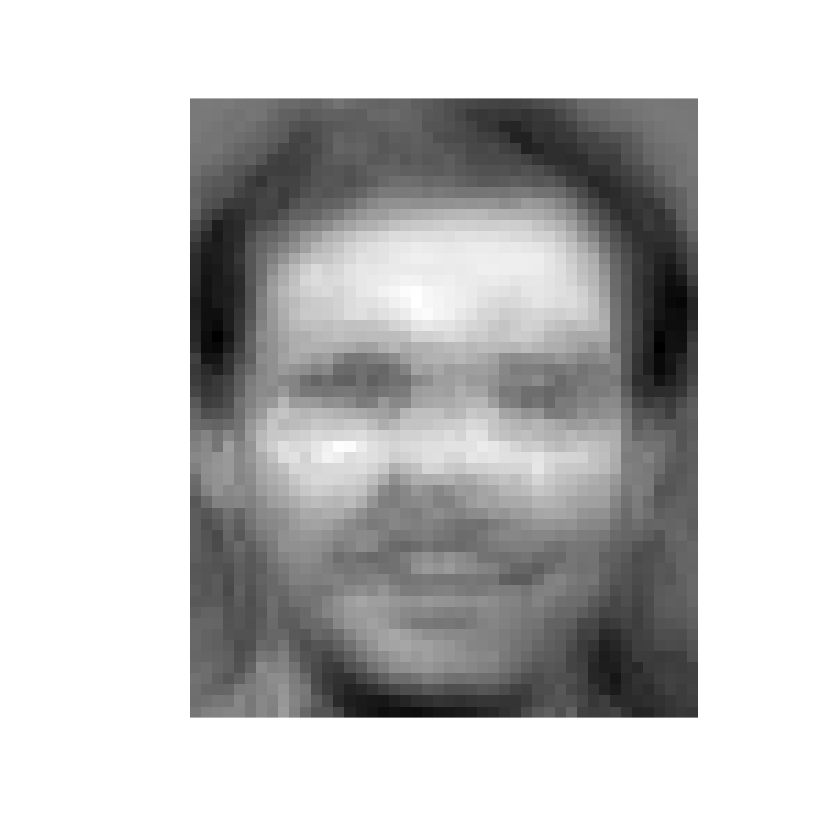

In [ ]:
Xs_rec <- Xs %*% vectores_propios[, 1:L] %*% t(vectores_propios[, 1:L])
X_err <- Xs - Xs_rec
R2 <- 1 - apply(X_err, 1, var) / apply(Xs, 1, var)

mejor_persona <- which.max(R2)
peor_persona <- which.min(R2)

plt_img(matrix(X_vector[mejor_persona, ], nrow = R, ncol = C))
plt_img(matrix(X_vector[peor_persona, ], nrow = R, ncol = C))

X_orig_rec <- Xs_rec[3, ] * X_std + X_mean
plt_img(matrix(X_orig_rec, nrow = R, ncol = C))
